In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

vectorized: 1.3970, 0.0699 ns, 0.0349 cycles
cmov: 7.1288, 7.1288 ns, 3.5644 cycles

25%: 3.5886, 3.5886 ns, 1.7943 cycles
50%: 6.4569, 6.4569 ns, 3.2285 cycles
1%: 0.8506, 0.8506 ns, 0.4253 cycles
0%: 0.6871, 0.6871 ns, 0.3435 cycles
100% 4.0269, 4.0269 ns, 2.0134 cycles

mov     ecx, -4000000
; todo

mov     esi, dword ptr [rdx + a+4000000]
cmp     esi, 50
cmovge  esi, eax
add     dword ptr [rsp + 12], esi
add     rdx, 4
jne     .LBB0_4

        mov     rcx, -4000000
        jmp     body
counter:
        add     rcx, 4
        jz      finished
body:
        mov     edx, dword ptr [rcx + a + 4000000]
        cmp     edx, 49
        jg      counter
        add     dword ptr [rsp + 12], edx
        jmp     counter

In [50]:
def bench(n=10**6, p=50, t=10**8, sort=False, cmov=False, unroll=False, cc='clang++'):
    res = !{cc} -std=c++17 -O3 -march=native -D N={n} -D P={p} -D T={t} {"-D CMOV" if cmov else ""} {"-D SORT" if sort else ""} {"-funroll-loops" if unroll else ""} branching.cc -o run && ./run
    print(res)
    return float(res[0].split()[-1])

bench(n=100000, cmov=True)

['0.0069 0.0685 0.1370', '1220785000']


0.137

In [33]:
14/0.4800

29.166666666666668

In [37]:
bench(unroll)

['0.0189 0.1889 0.3778', '1225185500']


0.3778

In [66]:
14/0.14

99.99999999999999

In [63]:
bench(t=10**9, unroll=True)

['0.1811 0.1811 0.3623', '-633046888']


0.3623

In [13]:
bench(t=5 * 10**8, cmov=True)
bench(t=5 * 10**8, sort=True)
bench(t=5 * 10**8, n=1000)

['1.7615 3.5231 7.0462', '1830960204']
['1.0166 2.0331 4.0662', '1830960204']
['0.9857 1.9714 3.9428', '1751532704']


3.9428

In [4]:
ps = list(range(0, 101))
#rs = [bench(p=p) for p in ps]

In [26]:
bench(p=25)

["branching.cc:34:29: warning: unknown attribute 'likely' ignored [-Wunknown-attributes]", '            if (a[i] < P) [[likely]]', '                            ^', '1 warning generated.', '0.3808 3.8082 7.6164', '300352100']


ValueError: could not convert string to float: '[-Wunknown-attributes]'

In [19]:
likely = [bench(p=p) for p in ps]

["branching.cc:34:29: warning: unknown attribute 'likely' ignored [-Wunknown-attributes]", '            if (a[i] < P) [[likely]]', '                            ^', "branching.cc:42:20: error: use of undeclared identifier 'sum'", '    printf("%d\\n", sum);', '                   ^', '1 warning and 1 error generated.']


ValueError: could not convert string to float: '[-Wunknown-attributes]'

In [ ]:
likely = [bench(p=p) for p in ps]

In [15]:
import pickle

with open('ps.pkl', 'wb') as file:
    pickle.dump(rs, file)

In [2]:
import pickle

with open('ps.pkl', 'rb') as file:
    rs = pickle.load(file)

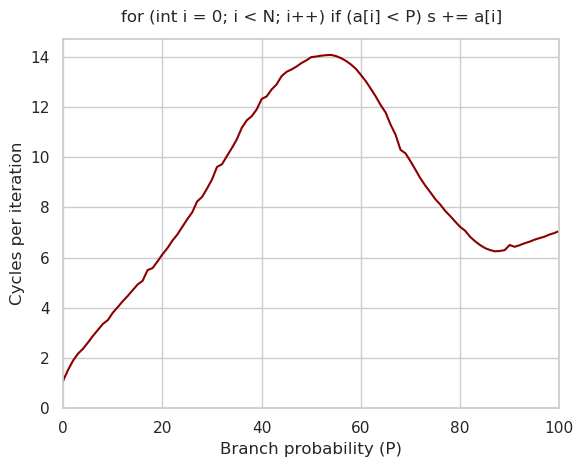

In [5]:
plt.plot(ps, rs, c='darkred')

plt.xlabel('Branch probability (P)')
plt.ylabel('Cycles per iteration')

plt.title('for (int i = 0; i < N; i++) if (a[i] < P) s += a[i]', pad=12)

#plt.legend(loc='best')

plt.ylim(bottom=0)
plt.margins(0)

fig = plt.gcf()
fig.savefig('branchy-vs-branchless.svg')
plt.show()